# Exploração de Dados, Pré-processamento e Levantamento de Hipóteses 
# Seção 4.2 (SPRINT 2)

Este notebook documenta a análise e transformação dos dados realizada durante a sprint. Serão apresentados os processos de exploração, pré-processamento dos dados e as hipóteses geradas a partir da análise.

## 4.2.1. Exploração de Dados (EDA)
Nesta seção, será apresentada uma análise detalhada das características das variáveis que compõem o conjunto de dados. O objetivo é identificar as principais tendências, padrões e possíveis inconsistências, facilitando o entendimento do comportamento dos dados. Esta análise é crucial para direcionar as etapas subsequentes do desenvolvimento do modelo preditivo.

### Carregando os Dados

#### Instalando bibliotecas

In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn scipy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Fazendo o merge das tabelas

In [2]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

generate_plots = True # Mude caso queira regerar todos os gráficos (pode demorar)

# Definindo os caminhos dos arquivos
file_paths = [
    '../assets/dataset/month_2.csv',
    '../assets/dataset/month_3.csv',
    '../assets/dataset/month_4.csv',
    '../assets/dataset/month_5.csv',
    '../assets/dataset/month_6.csv'
    ]

info_cadastral = pd.read_csv('../assets/dataset/informacao_cadastral.csv')



# Carregando os arquivos em DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Junta todos os DataFrames em um único DataFrame por 'clientCode' e 'clientIndex'
df_mensal = pd.concat(dfs, ignore_index=True)
df = pd.merge(df_mensal, info_cadastral, on=['clientCode', 'clientIndex'], how='left')

# Exibe as primeiras 5 linhas do DataFrame
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../assets/datasets/informacao_cadastral.csv'

In [ ]:
print(f"Colunas no dataframe (df): \n\n{df.columns}")

Colunas no dataframe (df): 

Index(['clientCode', 'clientIndex', 'meterIndex', 'initialIndex', 'pulseCount',
       'gain', 'datetime', 'meterSN', 'inputType', 'model', 'rssi',
       'gatewayGeoLocation.alt', 'gatewayGeoLocation.lat',
       'gatewayGeoLocation.long', 'cep', 'bairro', 'cidade', 'categoria',
       'contratacao', 'situacao', 'perfil_consumo', 'condCode', 'condIndex'],
      dtype='object')


### Estatística Descritiva
A seguir, são apresentadas as estatísticas descritivas básicas de cada coluna do conjunto de dados, bem como a classificação das variáveis em numéricas ou categóricas.

#### Descrição Básica

In [ ]:
# Mostra o tamanho e a forma do DataFrame
print(f"Formato do DataFrame (linha, colunas): \nLinhas: {df.shape[0]} \nColunas: {df.shape[1]}")

# Estatísticas descritivas do DataFrame (média, desvio padrão, mínimo, máximo, etc)
print("\nEstatísticas descritivas:")
df.describe().apply(lambda x: x.apply('{:.2f}'.format))

Formato do DataFrame (linha, colunas): 
Linhas: 2951243 
Colunas: 23

Estatísticas descritivas:


,clientIndex,meterIndex,initialIndex,pulseCount,gain,rssi,gatewayGeoLocation.alt,gatewayGeoLocation.lat,gatewayGeoLocation.long,condIndex
count,2951243.00,2951243.00,2951243.00,2951243.00,1976800.00,1467568.00,618081.00,618081.00,618081.00,2777461.00
mean,0.04,1387.27,1324.94,3696.61,0.01,-101.48,96.69,-30.02,-51.20,0.00
std,0.38,21438.47,21359.00,18996.82,0.01,13.78,59.80,0.27,0.19,0.00
min,0.00,-89.00,-89.00,0.00,0.01,-131.00,32.00,-30.13,-51.24,0.00
25%,0.00,10.53,0.00,46.12,0.01,-112.00,65.00,-30.09,-51.23,0.00
50%,0.00,35.09,2.87,378.00,0.01,-105.00,91.00,-30.03,-51.23,0.00
75%,0.00,90.30,19.41,2574.00,0.01,-96.00,103.00,-30.03,-51.19,0.00
max,10.00,644396.63,641554.33,4010299.00,0.10,123.00,923.00,-22.94,-46.37,0.00


#### Analisando valores nulos

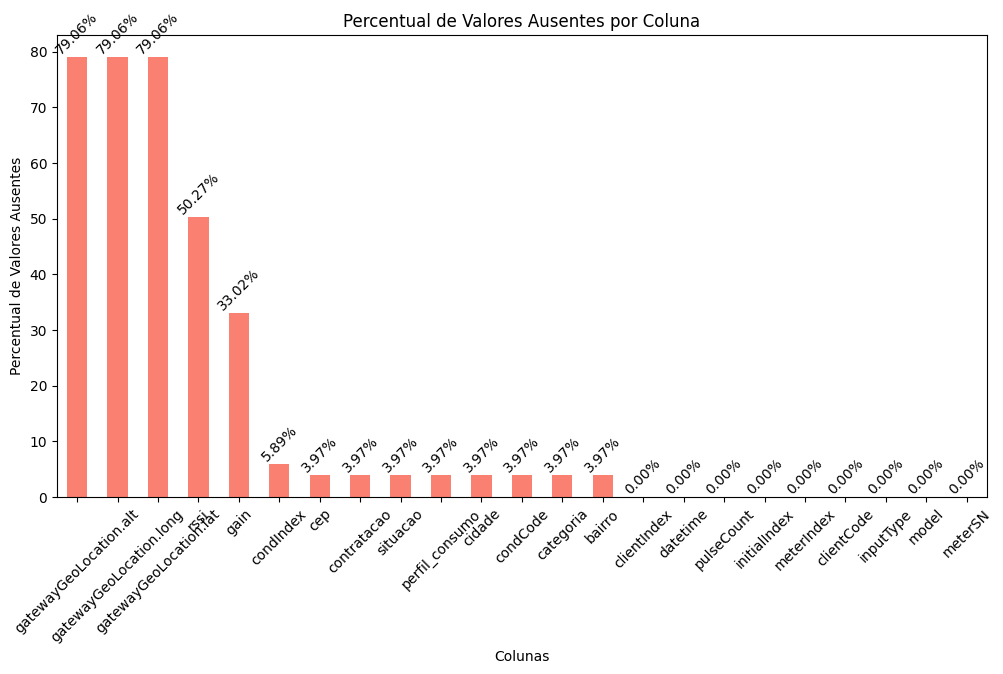

In [ ]:
import matplotlib.pyplot as plt

# Calcula a porcentagem de valores ausentes em cada coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Ordena as colunas com valores ausentes em ordem decrescente
missing_percentage = missing_percentage.sort_values(ascending=False)

# Cria um gráfico de barras com as porcentagens de valores ausentes
plt.figure(figsize=(12, 6))
bars = missing_percentage.plot(kind='bar', color='salmon')
plt.title('Percentual de Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Percentual de Valores Ausentes')
plt.xticks(rotation=45)

# Adiciona os números de valores nulos na diagonal
for bar, missing_count in zip(bars.patches, missing_percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{missing_count:.2f}%', ha='center', va='bottom', rotation=45)

plt.show()

As colunas de geolocalização ('gatewayGeoLocation.alt', 'gatewayGeoLocation.lat' e 'gatewayGeoLocation.long') tem quase 80% de nulos

#### Tipos de dados cada coluna

In [ ]:
df.dtypes

clientCode                  object
clientIndex                  int64
meterIndex                 float64
initialIndex               float64
pulseCount                 float64
gain                       float64
datetime                    object
meterSN                     object
inputType                   object
model                       object
rssi                       float64
gatewayGeoLocation.alt     float64
gatewayGeoLocation.lat     float64
gatewayGeoLocation.long    float64
cep                         object
bairro                      object
cidade                      object
categoria                   object
contratacao                 object
situacao                    object
perfil_consumo              object
condCode                    object
condIndex                  float64
dtype: object

In [ ]:
# Separando as colunas entre identificadoras, categóricas e numéricas
id_features = ['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']
categorical_features = [col for col in df.select_dtypes(include=['object']).columns if col not in id_features]
numerical_features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in id_features]

# Exibindo as colunas categóricas e numéricas
print(f"{len(id_features)} id features:", id_features)
print(f"{len(categorical_features)} categorical features:", categorical_features)
print(f"{len(numerical_features)} numerical features:", numerical_features)


5 id features: ['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']
10 categorical features: ['datetime', 'inputType', 'model', 'cep', 'bairro', 'cidade', 'categoria', 'contratacao', 'situacao', 'perfil_consumo']
8 numerical features: ['meterIndex', 'initialIndex', 'pulseCount', 'gain', 'rssi', 'gatewayGeoLocation.alt', 'gatewayGeoLocation.lat', 'gatewayGeoLocation.long']


### Explorando Variáveis Chave e Relações

#### Matriz de Correlação

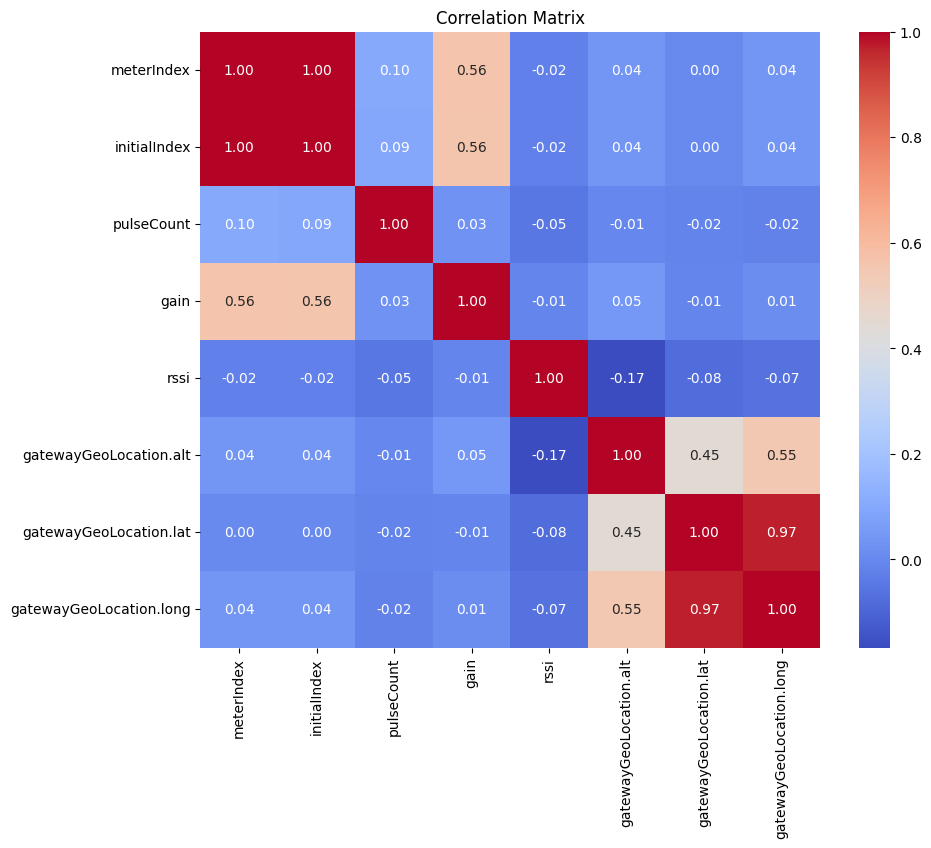

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = df[numerical_features].corr()

# Cria um gráfico de calor com a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Gráfico de Dispersão de meterIndex vs. initialIndex com gain como Escala de Cor

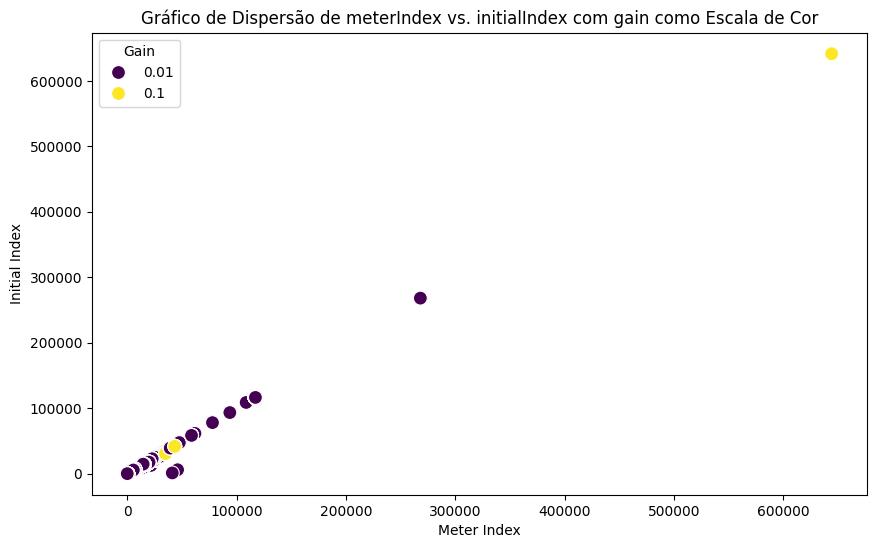

In [ ]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='meterIndex', y='initialIndex', hue='gain', palette='viridis', s=100)
plt.title('Gráfico de Dispersão de meterIndex vs. initialIndex com gain como Escala de Cor')
plt.xlabel('Meter Index')
plt.ylabel('Initial Index')

# Adiciona a legenda ao gráfico
scatter.legend(title='Gain')
plt.show()

#### Histograma de RSSI

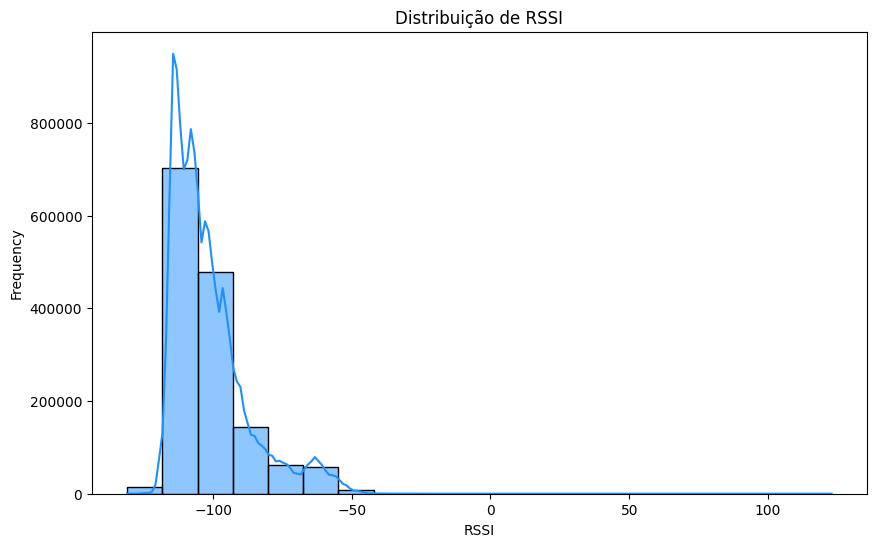

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rssi'], kde=True, bins=20, color='dodgerblue')
plt.title('Distribuição de RSSI')
plt.xlabel('RSSI')
plt.ylabel('Frequency')
plt.show()

#### Scatter Plot de Gain e Pulse Count

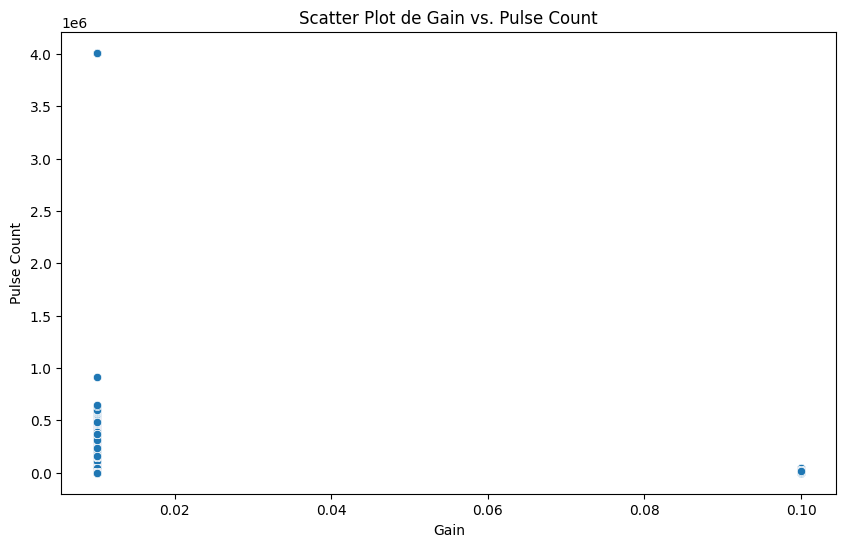

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gain', y='pulseCount')
plt.title('Scatter Plot de Gain vs. Pulse Count')
plt.xlabel('Gain')
plt.ylabel('Pulse Count')
plt.show()

Gain aparenta só ter valores de 0.1 e 0.01

In [ ]:
df['gain'].value_counts()

gain
0.01    1966995
0.10       9805
Name: count, dtype: int64

#### Scatter plot de meterIndex vs. pulseCount

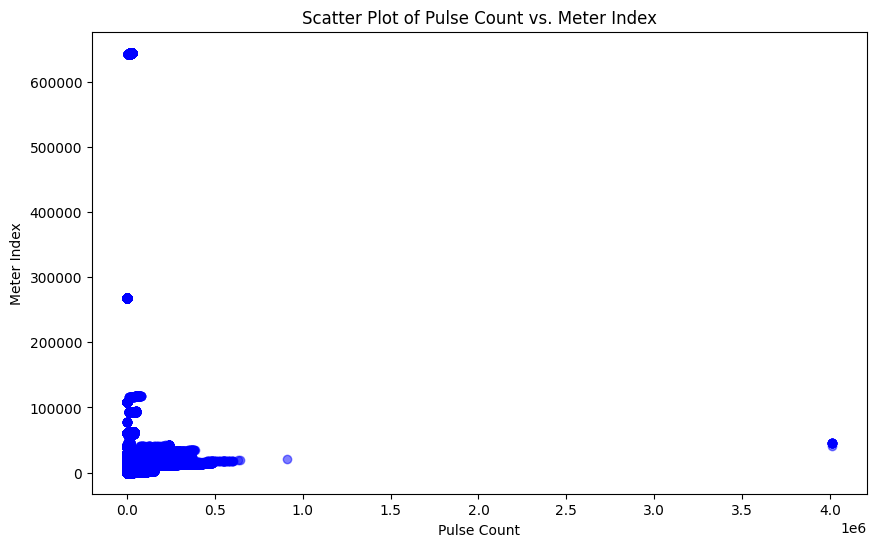

In [ ]:
# Cria um gráfico de barras com a contagem de valores únicos da coluna 'gain'
plt.figure(figsize=(10, 6))
plt.scatter(df['pulseCount'], df['meterIndex'], alpha=0.5, color='blue')

# Adiciona título e rótulos aos eixos
plt.title('Scatter Plot of Pulse Count vs. Meter Index')
plt.xlabel('Pulse Count')
plt.ylabel('Meter Index')

# Exibe o gráfico
plt.show()

#### Histograma de pulseCount

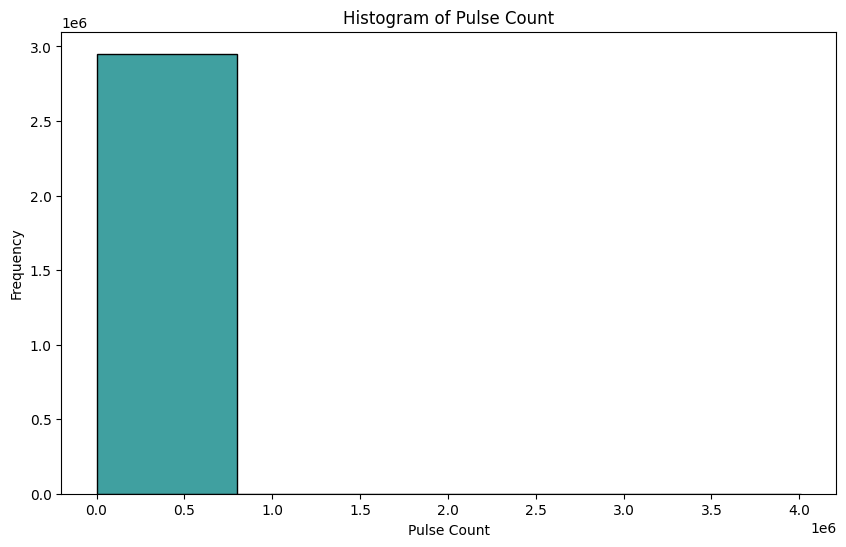

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pulseCount'], bins=5, kde=False, color='teal')
plt.title('Histogram of Pulse Count')
plt.xlabel('Pulse Count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['pulseCount'].describe().round(3)

count    2951243.000
mean        3696.606
std        18996.824
min            0.000
25%           46.120
50%          378.000
75%         2574.000
max      4010299.000
Name: pulseCount, dtype: float64

#### Histograma de todas as colunas numéricas

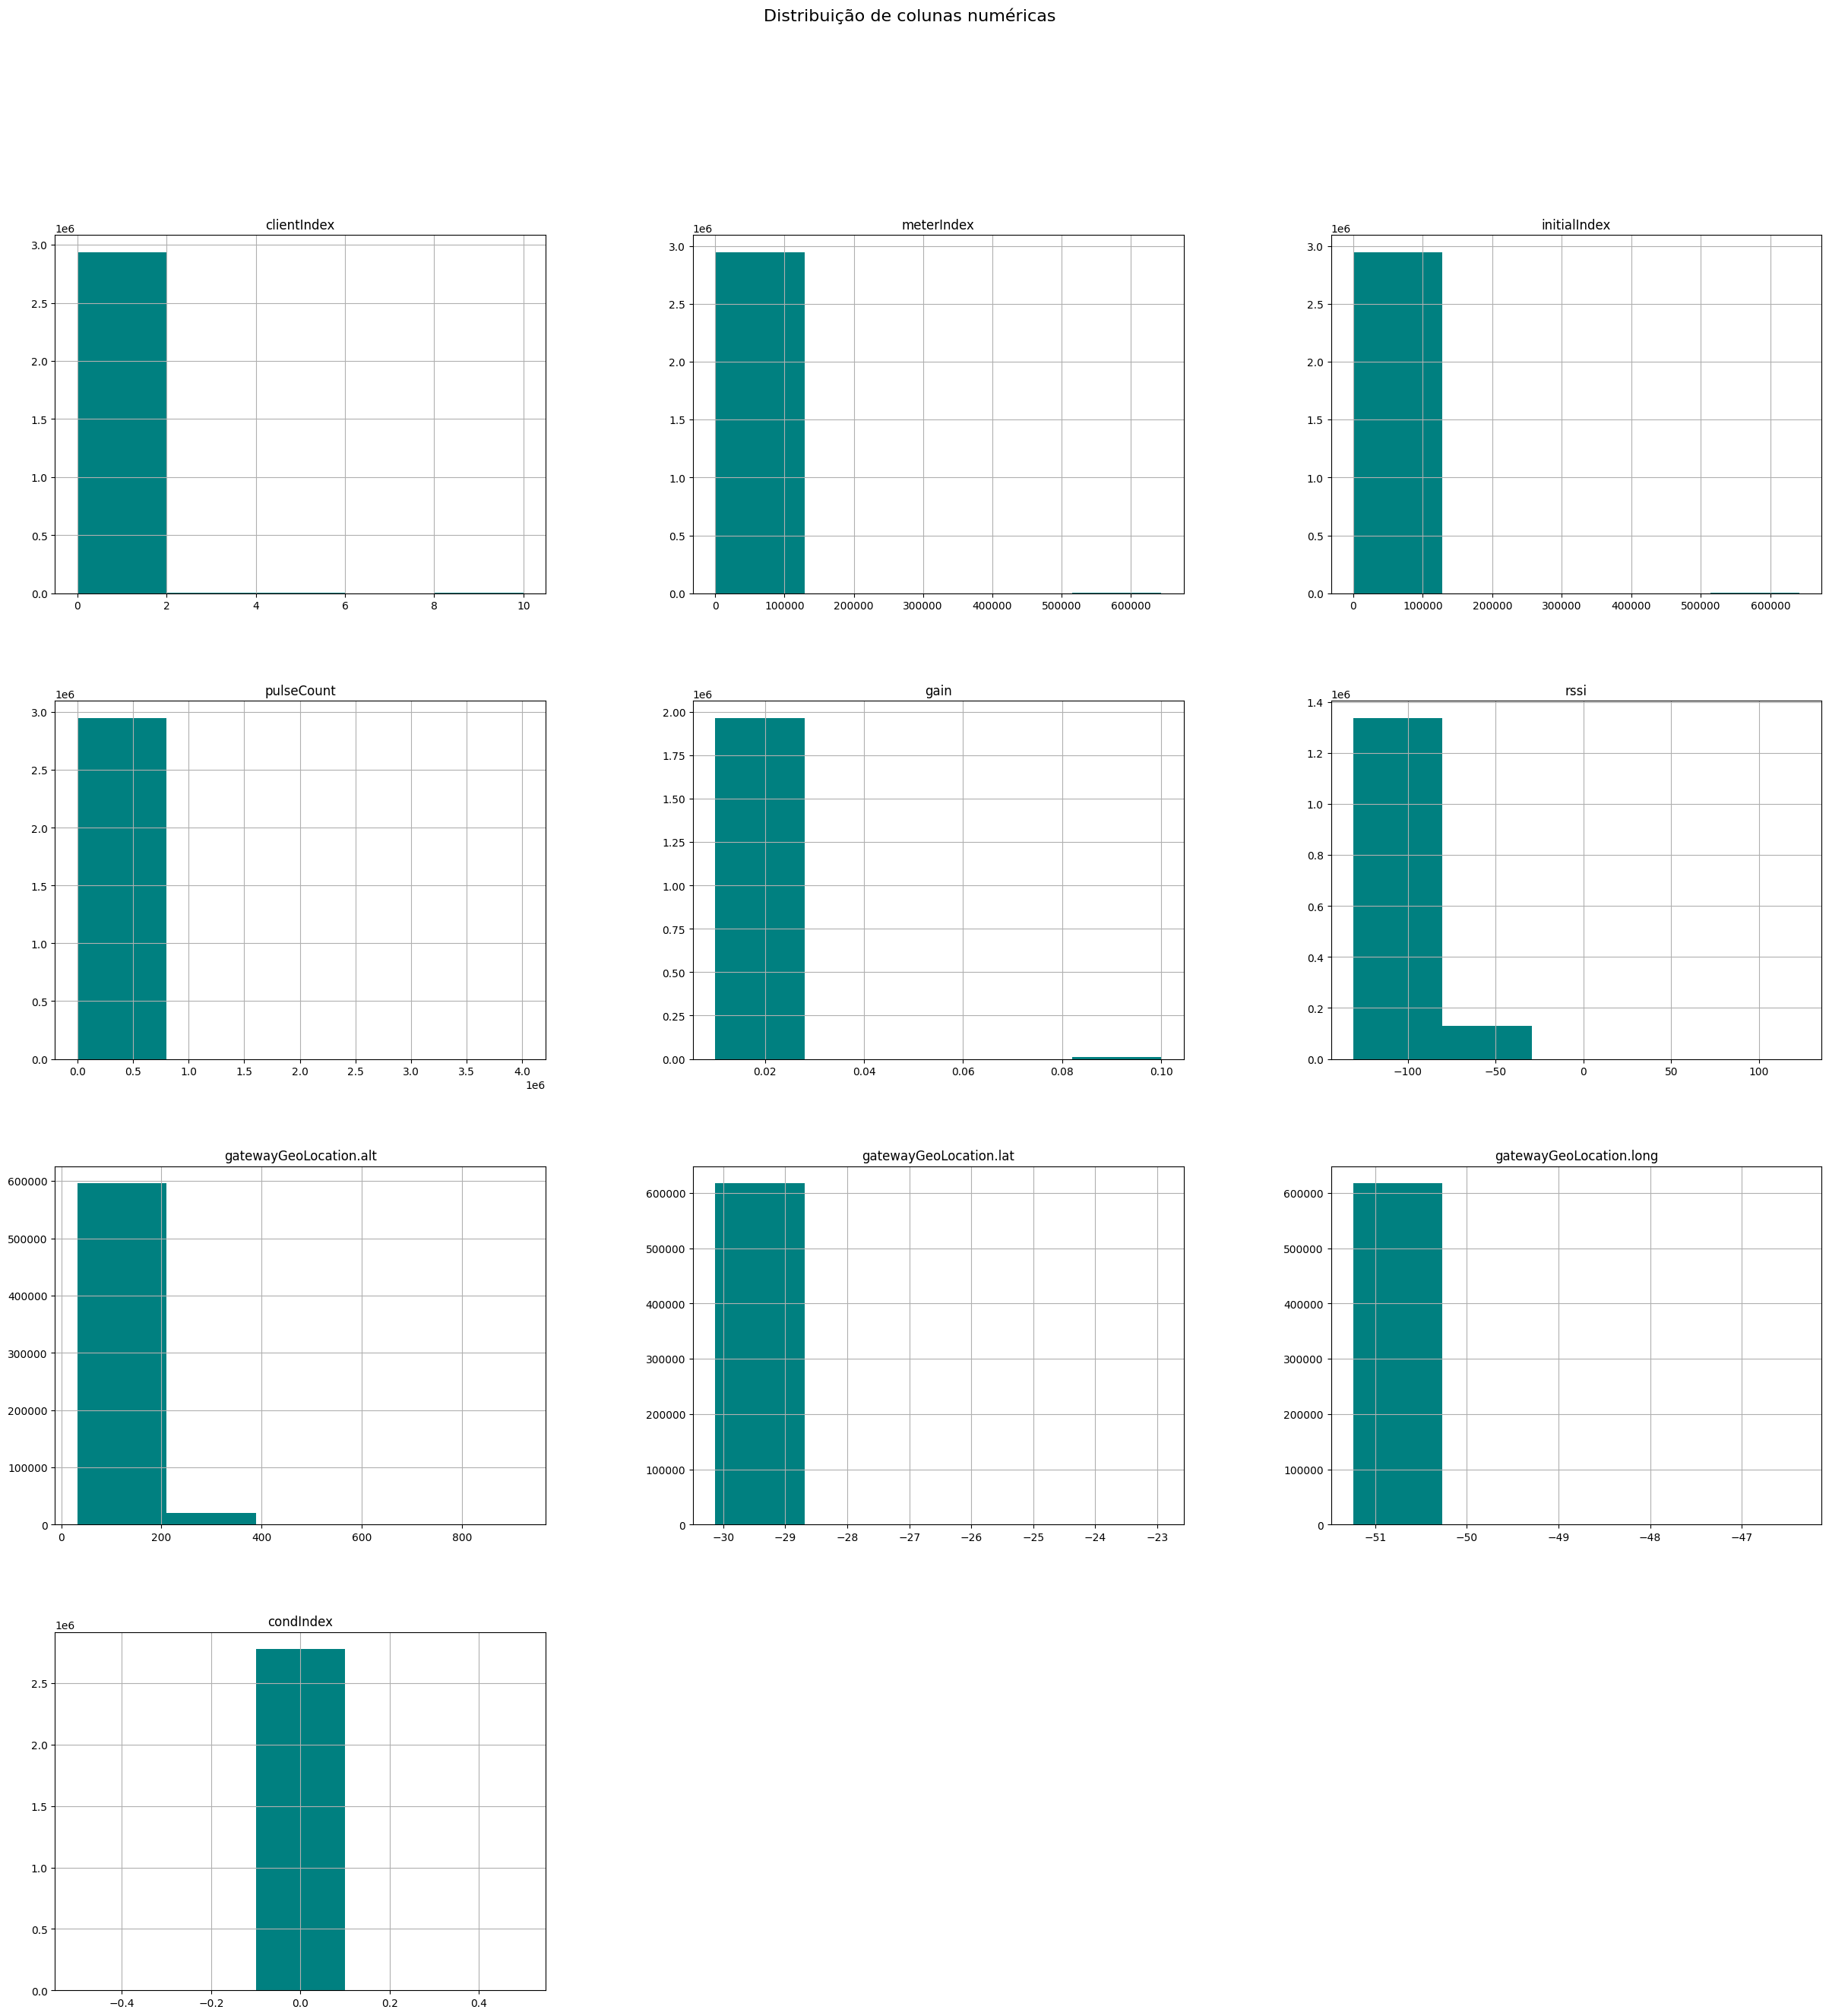

In [ ]:
# Cria histogramas para todas as colunas numéricas
df.hist(bins=5, figsize=(30, 30), color='teal')
plt.suptitle('Distribuição de colunas numéricas', fontsize=16)
plt.show()

#### Gráfico de Regressão de pulseCount vs. rssi

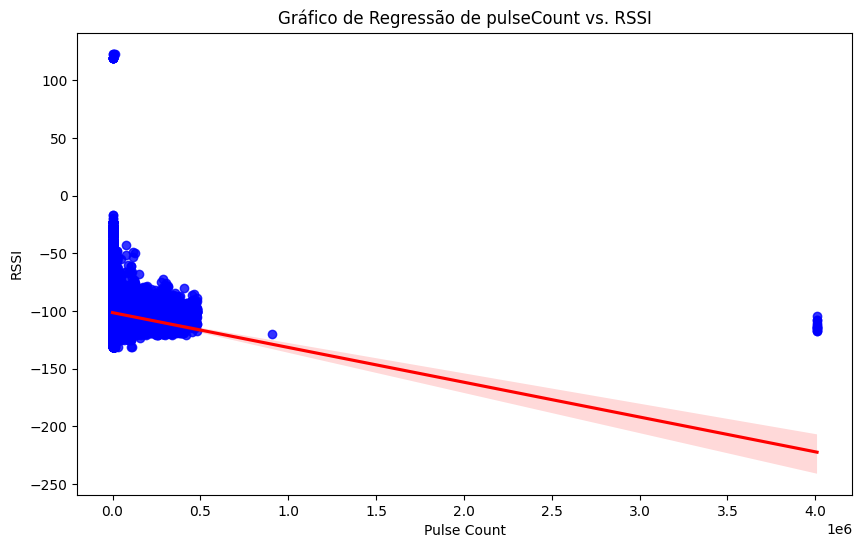

In [ ]:
if generate_plots:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='pulseCount', y='rssi', ci=95, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title('Gráfico de Regressão de pulseCount vs. RSSI')
    plt.xlabel('Pulse Count')
    plt.ylabel('RSSI')
    plt.show()

#### Gráfico de regressão de pulseCount vs. meterIndex

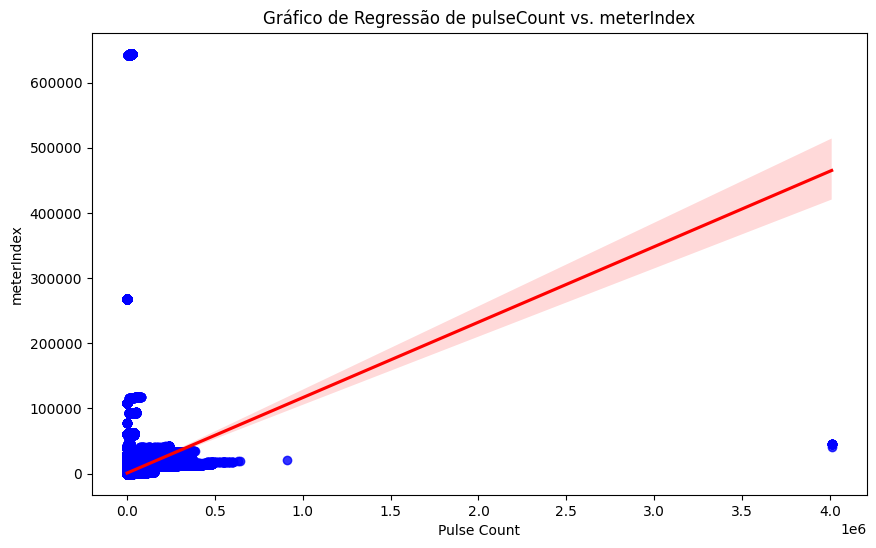

In [ ]:
if generate_plots:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='pulseCount', y='meterIndex', ci=95, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    plt.title('Gráfico de Regressão de pulseCount vs. meterIndex')
    plt.xlabel('Pulse Count')
    plt.ylabel('meterIndex')
    plt.show()

## 4.2.2. Pré-processamento dos Dados

O pré-processamento dos dados envolve a limpeza e transformação das variáveis para preparar o conjunto de dados para a modelagem. Nesta seção, serão abordadas as seguintes etapas: tratamento de valores ausentes, identificação de outliers e criação de novas features.

### Transformação de Dados

Para melhorar a performance dos modelos preditivos, algumas variáveis foram transformadas. A seguir estão as transformações aplicadas:
- **Normalização**: A variável `gain` foi normalizada para reduzir o impacto de escalas diferentes entre as variáveis.
- **Transformação logarítmica**: Aplicada na variável `pulseCount` para lidar com a alta variabilidade e melhorar a distribuição dos dados.
- **Codificação de variáveis categóricas**: As variáveis `inputType` e `model` foram codificadas usando one-hot encoding para permitir que os modelos utilizem essas informações.

### Tratamento de valores nulos

De acordo com o gráfico de percentual de valores ausentes por coluna e a tabela de estatística descritiva, podemos concluir que os valores nulos nas colunas 'gain' e 'rssi', poderão ser substituidos por suas respectivas média, moda ou mediana, sem afetar significativamente qualquer análise.

#### Tratando o rssi

In [ ]:
rssi_mean = df["rssi"].mean() # Calcula a média da coluna rssi
rssi_mode = df["rssi"].mode() # Calcula a moda da coluna rssi 
rssi_median = df["rssi"].median() # Calcula a mediana da coluna rssi

print(f"Média da coluna rssi: {rssi_mean:.2f}") 
print(f"Moda da coluna rssi: {rssi_mode.values[0]:.2f}")
print(f"Mediana da coluna rssi: {rssi_median:.2f}")

Média da coluna rssi: -101.48
Moda da coluna rssi: -101.48
Mediana da coluna rssi: -101.48


In [ ]:
df["rssi"] = df["rssi"].replace(np.nan, rssi_mean) # Substitui os valores nulos pela média da coluna rssi

#### Tratando o gain

In [ ]:
gain_mean = df["gain"].mean() # Calcula a média da coluna gain
gain_mode = df["gain"].mode() # Calcula a moda da coluna gain
gain_median = df["gain"].median() # Calcula a mediana da coluna gain

print(f"Média da coluna gain: {gain_mean:.5f}")
print(f"Moda da coluna gain: {gain_mode.values[0]:.5f}")
print(f"Mediana da coluna gain: {gain_median:.5f}")

Média da coluna gain: 0.01030
Moda da coluna gain: 0.01000
Mediana da coluna gain: 0.01000


In [ ]:
df["gain"] = df["gain"].replace(np.nan, gain_mode.values[0]) # Substitui os valores nulos pela moda da coluna gain

### Variáveis Categóricos

#### Análise

In [ ]:
print(categorical_features)

['datetime', 'inputType', 'model', 'cep', 'bairro', 'cidade', 'categoria', 'contratacao', 'situacao', 'perfil_consumo']


In [ ]:
# Dicionário para armazenar a cardinalidade de cada feature categórica
cardinalities = {}

# Loop através de cada feature categórica, excluindo 'datetime'
for feature in categorical_features:
    if feature != 'datetime':  # Exclui a coluna 'datetime'
        cardinality = len(df[feature].unique())
        cardinalities[feature] = cardinality

# Ordena o dicionário pela cardinalidade em ordem decrescente
sorted_cardinalities = dict(sorted(cardinalities.items(), key=lambda item: item[1], reverse=True))

# Imprime a cardinalidade de cada feature em ordem decrescente
for feature, cardinality in sorted_cardinalities.items():
    print(f"Feature: {feature}, Cardinalidade: {cardinality}")


Feature: contratacao, Cardinalidade: 107
Feature: cep, Cardinalidade: 82
Feature: bairro, Cardinalidade: 27
Feature: inputType, Cardinalidade: 9
Feature: cidade, Cardinalidade: 8
Feature: perfil_consumo, Cardinalidade: 8
Feature: categoria, Cardinalidade: 5
Feature: situacao, Cardinalidade: 4
Feature: model, Cardinalidade: 2


In [ ]:
# Imprime a cardinalidade e os primeiros 10 valores únicos de cada feature em ordem decrescente
for feature in sorted_cardinalities:
    unique_values = df[feature].unique()
    cardinality = sorted_cardinalities[feature]

    print(f"Feature: {feature}")
    print(f"Cardinalidade: {cardinality}")
    print(f"Primeiros 10 Valores Únicos: {unique_values[:10]}\n")

Feature: contratacao
Cardinalidade: 107
Primeiros 10 Valores Únicos: ['2023-06-22' '2023-10-13' '2024-01-02' '2023-04-18' '2023-09-15'
 '2023-08-17' '2023-06-26' nan '2019-03-21' '2019-06-10']

Feature: cep
Cardinalidade: 82
Primeiros 10 Valores Únicos: ['90670-130' '90440-150' '90540-041' nan '90050-230' '90050-310'
 '90050-130' '90001-970' '90050-320' '90050-321']

Feature: bairro
Cardinalidade: 27
Primeiros 10 Valores Únicos: ['JARDIM BOTÂNICO' 'PETRÓPOLIS' 'AUXILIADORA' 'SÃO JOÃO' nan
 'CIDADE BAIXA' 'MENINO DEUS' 'MONT SERRAT' 'BOA VISTA' 'HIGIENÓPOLIS']

Feature: inputType
Cardinalidade: 9
Primeiros 10 Valores Únicos: ['DI1' 'DI4' 'DI3' 'DI2' 'DI8' 'DI7' 'DI6' 'DI5' 'leituraRemota']

Feature: cidade
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['PORTO ALEGRE' nan 'SÃO LEOPOLDO' 'SAO LEOPOLDO' 'NOVO HAMBURGO' 'CANOAS'
 'GRAVATAÍ' 'GRAVATAI']

Feature: perfil_consumo
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['Cocção + Aquecedor' nan 'Cocção + Caldeira' '-' 'Aquecedor' 'Cocção

In [ ]:
df['perfil_consumo'].value_counts() # Mostra os perfis de consumo

perfil_consumo
Cocção + Aquecedor              2545760
Cocção                           262445
-                                 15382
Aquecedor                          3157
Cocção + Caldeira                  2868
Caldeira                           2520
Cocção + Aquecedor + Piscina       2023
Name: count, dtype: int64

Percebe-se que, na verdade, há apenas 3 categorias em perfil de consumo: Aquecedor, Cocção, e Piscina.

Contratação, CEP e bairro possuem alta cardinalidades vamos ter que tratar de alguma forma diferente.

Para a contratação podemos criar uma feature de dias desde a contratação.

Para o CEP podemos remover o '-' e tratar como número, uma vez que números próximos de CEP possuem também proximidade geográfia (i.e. o CEP '22000-200' é mais próximo geográficamente de '23200-200' do que de '12200-200').
Já para o bairro

Para bairro podemos analisar o gráfico, parece fazer sentido pegar as 9 categorias mais frequentes (até Santa Cecília), pois com 1/3 da cardinalidade (9 comparado ao total de 27 bairros) corresponde a mais de 80% dos bairros. 
Assim transformaremos os demais bairros em uma coluna de "outros".

#### Entedimento

As colunas apresentam baixa cardinalidade, a maior sendo 'inputType' com 9 categorias diferentes, e nenhuma sendo ordinal.
Assim usaremos OneHotEncoding (OHE) em todas elas (exceto 'perfil_consumo', 'CEP', 'bairro' e 'contratacao'), a fim de preservar ao máximo a informação contida nas variáveis.

No caso do perfil de consumo ('perfil_consumo'), é possível perceber que existem apenas 3 categorias reais (Aquecedor, Cocção e Piscina), assim criaremos 3 colunas binárias, onde 1 indicará que o cliente possui, mas não necessariamente de forma exclusiva, aquele perfil.

#### Codificação

In [ ]:
# Criando df_encoded para preservar o df original
df_encoded = df.copy()

##### Transformação da data para o formato unix timestamp

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) # Converte a coluna datetime para o formato datetime

df['timestamp'] = df['datetime'].apply(lambda x: x.timestamp() if pd.notnull(x) else None) # Cria uma nova coluna derivada da coluna datetime no DataFrame com os valores convertidos para timestamp, ignorando os valores nulos

##### Enconding Geral (OneHotEncoder)

In [ ]:
# Remover as colunas que terão um tratamento diferente
ohe_categorical_cols = [col for col in categorical_features if col not in ['datetime', 'perfil_consumo', 'cep', 'bairro', 'contratacao']]

# Aplicar OneHotEncoder nas colunas selecionadas, mantendo o prefixo da variável original
df_encoded_ohe = pd.get_dummies(df_encoded[ohe_categorical_cols], prefix=ohe_categorical_cols)

# Contar quantas colunas foram geradas no processo de One-Hot Encoding
num_new_columns = df_encoded_ohe.shape[1]
num_initial_columns = len(ohe_categorical_cols)
num_total_columns_before = df_encoded.shape[1]
num_total_columns_after = df_encoded.shape[1]

# Exibir informações detalhadas sobre o processo de codificação
print(f"Quantidade inicial de colunas categóricas codificadas: {num_initial_columns}")
print(f"Número de novas colunas geradas pelo One-Hot Encoding: {num_new_columns}")
print(f"Número total de colunas antes da codificação (df): {num_total_columns_before}")
print(f"Número total de colunas após a codificação (df_encoded): {num_total_columns_after}")


# Exibir as primeiras linhas das novas colunas geradas
print("\nVisualização das novas colunas geradas:")
print(df_encoded_ohe.head())

# Manter as colunas que não foram codificadas
df_remaining = df_encoded.drop(columns=ohe_categorical_cols)

# Concatenar as colunas codificadas com as restantes do DataFrame
df_encoded = pd.concat([df_remaining, df_encoded_ohe], axis=1)

# Verificação final: Exibir as primeiras linhas do DataFrame completo
print("Primeiras linhas do DataFrame completo com todas as colunas:")
print(df_encoded.head())

Quantidade inicial de colunas categóricas codificadas: 5
Número de novas colunas geradas pelo One-Hot Encoding: 25
Número total de colunas antes da codificação (df): 24
Número total de colunas após a codificação (df_encoded): 24

Visualização das novas colunas geradas:
   inputType_DI1  inputType_DI2  inputType_DI3  inputType_DI4  inputType_DI5  \
0           True          False          False          False          False   
1           True          False          False          False          False   
2           True          False          False          False          False   
3          False          False          False           True          False   
4          False          False          False           True          False   

   inputType_DI6  inputType_DI7  inputType_DI8  inputType_leituraRemota  \
0          False          False          False                    False   
1          False          False          False                    False   
2          False        

##### Encoding 'contratação'

In [ ]:
# Calcular o número de valores NaN em 'contratacao'
num_nan_contratacao = df_encoded['contratacao'].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_nan_contratacao = (num_nan_contratacao / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'contratacao': {num_nan_contratacao}")
print(f"Percentual de valores NaN em 'contratacao': {percentual_nan_contratacao:.2f}%")

Número de valores NaN em 'contratacao': 117088
Percentual de valores NaN em 'contratacao': 3.97%


Para realizar o encoding de 'contratacao', vamos transformar a data de contratação em uma feature nova: número de dias desde a contrataçao ('dias_desde_contratacao'), tendo como data de referência o último dado disponível na base de dados, e tratando-a como 'int' daqui pra frente.

Depois, iremos inputar os dados nulos pela mediana e criar uma coluna binária 'contratacao_isnan' que persiste a inforamção de quais linhas eram nulas nessa coluna.

In [ ]:
# Converter as colunas 'contratacao' e 'datetime' para formato datetime
df_encoded['contratacao'] = pd.to_datetime(df_encoded['contratacao'], errors='coerce')
df_encoded['datetime'] = pd.to_datetime(df_encoded['datetime'], errors='coerce')

# Encontrar o último dia de contratação (ignorando NaNs)
ultimo_dia_contratacao = df_encoded['contratacao'].max()

# Encontrar o último timestamp (ignorando NaNs)
ultimo_timestamp = df_encoded['datetime'].max()

# Exibir as datas encontradas
print(f"Último dia de contratação: {ultimo_dia_contratacao}")
print(f"Último datetime: {ultimo_timestamp}")

Último dia de contratação: 2024-04-30 00:00:00
Último datetime: 2024-06-30 23:59:54


Vamos usar o último 'datetime' (variável 'ultimo_timestamp') como data de referência para nossa feature!

In [ ]:
# Passo 1: Converter a coluna 'contratacao' para o formato datetime
df_encoded['contratacao'] = pd.to_datetime(df_encoded['contratacao'], errors='coerce')

# Passo 2: Calcular o número de dias até a data de referência
data_referencia = ultimo_timestamp  # Último timestamp encontrado
df_encoded['dias_ate_referencia'] = (data_referencia - df_encoded['contratacao']).dt.days

# Passo 3: Criar a coluna binária 'contratacao_nan' para indicar valores NaN originais
df_encoded['contratacao_nan'] = df_encoded['dias_ate_referencia'].isna().astype(int)

# Passo 4: Substituir os valores NaN pela mediana
mediana_dias = df_encoded['dias_ate_referencia'].median()
df_encoded['dias_ate_referencia'] = df_encoded['dias_ate_referencia'].fillna(mediana_dias)

# Verificar a nova feature e a coluna binária
print(df_encoded[['contratacao', 'dias_ate_referencia', 'contratacao_nan']].head())

# Remover a coluna original 'contratacao'
df_encoded.drop(columns=['contratacao'], inplace=True)

# Contar o número de valores 1 na coluna 'contratacao_nan'
num_contratacao_nan_ones = df_encoded['contratacao_nan'].sum()
print(f"\nNúmero de valores 1 na coluna 'contratacao_nan': {num_contratacao_nan_ones}")
print(f"Percentual de valores NaN em 'contratacao_nan': {num_contratacao_nan_ones/len(df_encoded):.2%}")

  contratacao  dias_ate_referencia  contratacao_nan
0  2023-06-22                374.0                0
1  2023-06-22                374.0                0
2  2023-06-22                374.0                0
3  2023-06-22                374.0                0
4  2023-06-22                374.0                0

Número de valores 1 na coluna 'contratacao_nan': 117088
Percentual de valores NaN em 'contratacao_nan': 3.97%


##### Encoding 'cep'

In [ ]:
# Calcular o número de valores NaN em 'cep'
num_nan_cep = df_encoded['cep'].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_num_nan_cep = (num_nan_cep / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'cep' pré-encoding: {num_nan_cep}")
print(f"Percentual de valores NaN em 'cep' pré-encoding: {percentual_num_nan_cep:.2f}%")

Número de valores NaN em 'cep' pré-encoding: 117088
Percentual de valores NaN em 'cep' pré-encoding: 3.97%


Para 'cep' vamos substituir os valores 'nan' por 0, após isso retirar o hífen e tratar os valores como 'int', conforme a explicação na seção de entendimento.

In [ ]:
# Passo 1: Remover hífens e espaços em branco do CEP
df_encoded['cep_cleaned'] = df_encoded['cep'].str.replace("-", "").str.strip()

# Passo 2: Substituir strings vazias ou espaços em branco por NaN
df_encoded['cep_cleaned'] = df_encoded['cep_cleaned'].replace("", float('nan'))

# Passo 3: Substituir NaNs por um valor adequado, por exemplo, 0
df_encoded['cep_cleaned'] = df_encoded['cep_cleaned'].fillna('0')

# Passo 4: Converter a coluna limpa para inteiro
df_encoded['cep'] = df_encoded['cep_cleaned'].astype(int)

# Passo 5: Remover a coluna 'cep_cleaned'
df_encoded = df_encoded.drop(columns=['cep_cleaned'])

# Verificar as primeiras linhas para garantir que a conversão foi bem-sucedida
print(df_encoded['cep'].value_counts())

cep
94035330    348372
90035190    266360
90420180    234037
90050102    219001
90830180    218027
             ...  
90020004       172
90030131       158
90010320       144
90010272        31
90010030        20
Name: count, Length: 77, dtype: int64


In [ ]:
# Contar o número de ocorrências onde o CEP é igual a 0
count_cep_zero = (df_encoded['cep'] == 0).sum()

# Calcular o percentual que isso representa em relação ao total de linhas
percent_cep_zero = (count_cep_zero / len(df_encoded)) * 100

print(f"Contagem de valores onde o CEP é igual a 0 pós-encoding: {count_cep_zero}")
print(f"Percentual de valores onde o CEP é igual a 0 pós-encoding: {percent_cep_zero:.2f}%")

print(f"\nNúmero de valores NaN em 'cep' pré-encoding: {num_nan_cep}")
print(f"Percentual de valores NaN em 'cep' pré-encoding: {percentual_num_nan_cep:.2f}%")

Contagem de valores onde o CEP é igual a 0 pós-encoding: 119018
Percentual de valores onde o CEP é igual a 0 pós-encoding: 4.03%

Número de valores NaN em 'cep' pré-encoding: 117088
Percentual de valores NaN em 'cep' pré-encoding: 3.97%


Realizamos o encoding, mas algo não parece certo... apareceram cerca de 2 mil linhas a mais como zero em relação ao número de NaNs inicial em 'cep'.

Vamos investigar:

In [ ]:
# Remover espaços em branco e verificar se os valores são apenas '-' ou strings vazias após o strip
df['cep_cleaned'] = df['cep'].str.strip()

# Contar o número de ocorrências onde o CEP é apenas '-' ou uma string vazia
count_hyphen_or_empty = ((df['cep_cleaned'] == "-") | (df['cep_cleaned'] == "")).sum()

print(f"Número de linhas em df onde o CEP é apenas '-' ou uma string vazia após o strip: {count_hyphen_or_empty}")
print(f"Diferença não explicada pré e pós encoding: {count_cep_zero - num_nan_cep}")

Número de linhas em df onde o CEP é apenas '-' ou uma string vazia após o strip: 1930
Diferença não explicada pré e pós encoding: 1930


Conseguimos justificar. Os casos eram preenchimentos que estavam somente com espaços ou hífen, assim, após o 'strip()' (que remove espaços) podemos ver que eram, na verdade, células não-preenchidas.

Podemos remover o df['cep_cleand'] agora.

In [ ]:
df = df.drop(columns='cep_cleaned')

##### Encoding 'bairro'

In [ ]:
df_encoded['bairro'].value_counts()

bairro
CENTRO              495998
JARDIM BOTÂNICO     349416
BOM FIM             294862
RIO BRANCO          253296
CIDADE BAIXA        227235
NONOAI              218027
MONT SERRAT         208410
BOA VISTA           163164
SANTA CECÍLIA       139240
CRISTAL             123159
PETRÓPOLIS           65929
SÃO JOÃO             46010
PASSO DA AREIA       44971
AUXILIADORA          42928
BELA VISTA           42514
CENTRO HISTÓRICO     39401
MENINO DEUS          24342
CRISTO REDENTOR      24273
MOINHOS DE VENTO      9688
JARDIM DO SALSO       9197
HIGIENÓPOLIS          6382
PASSO D'AREIA         2281
SARANDI               1307
INDEPENDÊNCIA         1009
TRÊS FIGUEIRAS         579
TRISTEZA               537
Name: count, dtype: int64

In [ ]:
# Calcular o número de valores NaN em 'bairro'
num_nan_bairro = df_encoded['bairro'].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_num_nan_bairro = (num_nan_bairro / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'bairro' pré-encoding: {num_nan_bairro}")
print(f"Percentual de valores NaN em 'bairro' pré-encoding: {percentual_num_nan_bairro:.2f}%")

Número de valores NaN em 'bairro' pré-encoding: 117088
Percentual de valores NaN em 'bairro' pré-encoding: 3.97%


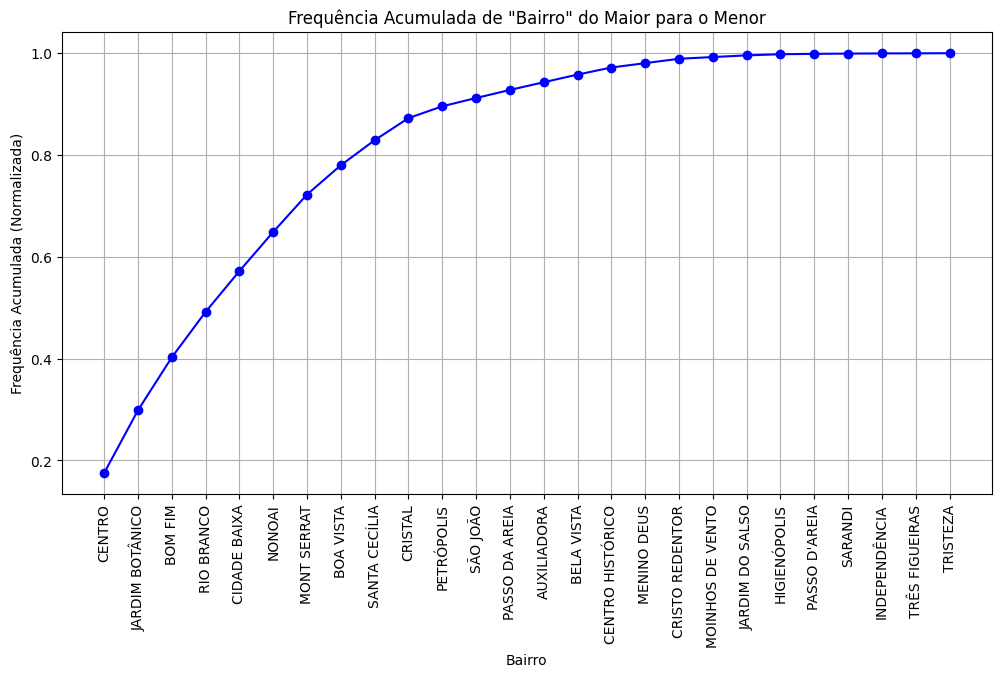

In [ ]:
# Passo 1: Calcular a frequência de cada categoria na coluna 'bairro' e ordenar
frequencia_bairro = df_encoded['bairro'].value_counts().sort_values(ascending=False)

# Calcular a frequência acumulada
frequencia_acumulada = frequencia_bairro.cumsum()

# Normalizar a frequência acumulada para obter a proporção (entre 0 e 1)
frequencia_acumulada = frequencia_acumulada / frequencia_acumulada.max()

# Passo 2: Plotar a frequência acumulada
plt.figure(figsize=(12, 6))
plt.plot(frequencia_acumulada, marker='o', linestyle='-', color='b')
plt.title('Frequência Acumulada de "Bairro" do Maior para o Menor')
plt.xlabel('Bairro')
plt.ylabel('Frequência Acumulada (Normalizada)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Para bairro podemos analisar o gráfico, parece fazer sentido pegar as 9 categorias mais frequentes (até Santa Cecília), pois com 1/3 da cardinalidade (9 comparado ao total de 27 bairros) corresponde a mais de 80% dos bairros. 
Assim transformaremos os demais bairros em uma coluna de "outros".

In [ ]:
# Obter os 9 principais bairros
top_9_bairros = frequencia_bairro.head(9).index

# Passo 2: Substituir os bairros que não estão entre os 9 principais por "Outros"
df_encoded['bairro'] = df_encoded['bairro'].apply(lambda x: x if x in top_9_bairros else 'Outros')

# Passo 3: Verificar o resultado
print(df_encoded['bairro'].value_counts())

bairro
Outros             601595
CENTRO             495998
JARDIM BOTÂNICO    349416
BOM FIM            294862
RIO BRANCO         253296
CIDADE BAIXA       227235
NONOAI             218027
MONT SERRAT        208410
BOA VISTA          163164
SANTA CECÍLIA      139240
Name: count, dtype: int64


In [ ]:
# Contar o número de ocorrências de "Outros"
outros_count = df_encoded['bairro'].value_counts()['Outros']

# Contar o total de registros
total_count = len(df_encoded)

# Calcular o percentual de "Outros" em relação ao total
percent_outros = (outros_count / total_count) * 100

# Imprimir o resultado
print(f"Número de registros como 'Outros': {outros_count}")
print(f"Percentual de 'Outros' em relação ao total: {percent_outros:.2f}%")

Número de registros como 'Outros': 601595
Percentual de 'Outros' em relação ao total: 20.38%


'Outros' é 20% dos casos, como queríamos, a diferença em relação ao gráfico é por causa dos 3.97% de casos nulos. Esses casos não serão 'True' (1) em nenhuma das colunas binárias após o OHE, assim, preservaremos a informação de queram nulos.

Agora só precisamos fazer o OHE das categorias restantes:

In [ ]:
# Passo 1: Aplicar o One-Hot Encoding na coluna 'bairro'
bairro_dummies = pd.get_dummies(df_encoded['bairro'], prefix='bairro')

# Passo 2: Remover a coluna original 'bairro'
df_encoded = df_encoded.drop(columns=['bairro'])

# Passo 3: Adicionar as colunas codificadas ao DataFrame original
df_encoded = pd.concat([df_encoded, bairro_dummies], axis=1)

In [ ]:
# Vamos exibir todas as colunas que começam com 'bairro_' para ver como ficou a codificação
print(f"Número de Colunas: {len(df_encoded.filter(like='bairro_').columns)}")
print(f"Colunas: {df_encoded.filter(like='bairro_').columns}")

Número de Colunas: 10
Colunas: Index(['bairro_BOA VISTA', 'bairro_BOM FIM', 'bairro_CENTRO',
       'bairro_CIDADE BAIXA', 'bairro_JARDIM BOTÂNICO', 'bairro_MONT SERRAT',
       'bairro_NONOAI', 'bairro_Outros', 'bairro_RIO BRANCO',
       'bairro_SANTA CECÍLIA'],
      dtype='object')


In [ ]:
# Contar quantas colunas foram geradas no processo de One-Hot Encoding
num_total_columns_before = df_encoded.shape[1]
num_total_columns_after = df_encoded.shape[1]

# Exibir informações detalhadas sobre o processo de codificação
print(f"Número total de colunas antes da codificação (df): {num_total_columns_before}")
print(f"Número total de colunas após a codificação (df_encoded): {num_total_columns_after}")

Número total de colunas antes da codificação (df): 54
Número total de colunas após a codificação (df_encoded): 54


##### Encoding 'perfil_consumo'

Relembrando as categorias de 'perfil_consumo'

In [ ]:
feature = 'perfil_consumo'
unique_values = df_encoded[feature].unique()
cardinality = sorted_cardinalities[feature]

print(f"Feature: {feature}")
print(f"Cardinalidade: {cardinality}")
print(f"Primeiros 10 Valores Únicos: {unique_values[:10]}\n")

Feature: perfil_consumo
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['Cocção + Aquecedor' nan 'Cocção + Caldeira' '-' 'Aquecedor' 'Cocção'
 'Caldeira' 'Cocção + Aquecedor + Piscina']



In [ ]:
# Passo 1: Criar as colunas binárias para cada perfil de consumo
df_encoded['perfil_aquecedor'] = df_encoded['perfil_consumo'].apply(lambda x: 1 if 'Aquecedor' in str(x) else 0)
df_encoded['perfil_coccao'] = df_encoded['perfil_consumo'].apply(lambda x: 1 if 'Cocção' in str(x) else 0)
df_encoded['perfil_piscina'] = df_encoded['perfil_consumo'].apply(lambda x: 1 if 'Piscina' in str(x) else 0)

# Passo 2: Verificar o resultado
print(df_encoded[['perfil_consumo', 'perfil_aquecedor', 'perfil_coccao', 'perfil_piscina']].sample(20))

# Passo 3: Remover a coluna original 'perfil_consumo'
df_encoded = df_encoded.drop(columns=['perfil_consumo'])

             perfil_consumo  perfil_aquecedor  perfil_coccao  perfil_piscina
1661075  Cocção + Aquecedor                 1              1               0
896025   Cocção + Aquecedor                 1              1               0
813248   Cocção + Aquecedor                 1              1               0
607731   Cocção + Aquecedor                 1              1               0
526837                    -                 0              0               0
2876960  Cocção + Aquecedor                 1              1               0
1780224  Cocção + Aquecedor                 1              1               0
2590386  Cocção + Aquecedor                 1              1               0
341967   Cocção + Aquecedor                 1              1               0
394708   Cocção + Aquecedor                 1              1               0
1004924  Cocção + Aquecedor                 1              1               0
28871    Cocção + Aquecedor                 1              1               0

Nota: não precisamos alterar os valores 'nan' ou '-', vistos nos valores únicos printados acima, porque esses valores serão codificados como 'False' nas 3 colunas binárias criadas para 'perfil_consumo'.

In [ ]:
# Calcular os percentuais de True (1) em cada coluna de perfil
percentuais_perfil = df_encoded[['perfil_aquecedor', 'perfil_coccao', 'perfil_piscina']].mean() * 100

# Exibir os percentuais
print("Percentuais de True (1) em cada coluna de perfil:")
print(percentuais_perfil)

# Filtrar os casos onde todos os 3 perfis são False (0)
casos_sem_perfil = df_encoded[(df_encoded['perfil_aquecedor'] == 0) &
                              (df_encoded['perfil_coccao'] == 0) &
                              (df_encoded['perfil_piscina'] == 0)]

# Calcular e exibir o percentual de casos onde todos os perfis são False
percentual_sem_perfil = (casos_sem_perfil.shape[0] / len(df_encoded)) * 100
print(f"\nPercentual de casos onde todos os perfis são False (0): {percentual_sem_perfil:.2f}%")


Percentuais de True (1) em cada coluna de perfil:
perfil_aquecedor    86.436122
perfil_coccao       95.319023
perfil_piscina       0.068547
dtype: float64

Percentual de casos onde todos os perfis são False (0): 4.57%


### Variáveis Numéricas

#### Análise

In [ ]:
df_encoded[numerical_features].describe().apply(lambda x: x.apply('{:.2f}'.format)) # Mostra as estatisticas descritivas das colunas numéricas

,meterIndex,initialIndex,pulseCount,gain,rssi,gatewayGeoLocation.alt,gatewayGeoLocation.lat,gatewayGeoLocation.long
count,2951243.00,2951243.00,2951243.00,2951243.00,2951243.00,618081.00,618081.00,618081.00
mean,1387.27,1324.94,3696.61,0.01,-101.48,96.69,-30.02,-51.20
std,21438.47,21359.00,18996.82,0.01,9.72,59.80,0.27,0.19
min,-89.00,-89.00,0.00,0.01,-131.00,32.00,-30.13,-51.24
25%,10.53,0.00,46.12,0.01,-105.00,65.00,-30.09,-51.23
50%,35.09,2.87,378.00,0.01,-101.48,91.00,-30.03,-51.23
75%,90.30,19.41,2574.00,0.01,-101.48,103.00,-30.03,-51.19
max,644396.63,641554.33,4010299.00,0.10,123.00,923.00,-22.94,-46.37


In [ ]:
# Obtenha as estatísticas descritivas
stats = df_encoded[numerical_features].describe()

# Calcule a razão do desvio-padrão sobre a média para cada coluna numérica
std_dev_to_mean_ratio = stats.loc['std'] / stats.loc['mean']

print(std_dev_to_mean_ratio)

meterIndex                 15.453744
initialIndex               16.120766
pulseCount                  5.138991
gain                        0.502859
rssi                       -0.095768
gatewayGeoLocation.alt      0.618449
gatewayGeoLocation.lat     -0.009142
gatewayGeoLocation.long    -0.003748
dtype: float64


Podemos notar que das variáveis numéricas iniciais (antes da codificação das variáveis categóricas) a 'pulseCount' se sobressai pelo seu alto desvio-padrão, por isso aplicaremos uma transformação logarítmica.

#### Codificação

##### Transformação logarítmica da coluna pulseCount

In [ ]:
# Aplica a transformação logarítmica na coluna pulseCount e salvar no df_encoded
df_encoded['log_pulseCount'] = np.log1p(df_encoded['pulseCount'])  # Aplica a transformação logarítmica na coluna pulseCount

# Verifica algumas linhas aleatórias para garantir que a transformação foi bem-sucedida
print(df_encoded[['pulseCount', 'log_pulseCount']].sample(10))

         pulseCount  log_pulseCount
602156      3921.00        8.274357
2213506     1106.00        7.009409
2213769     4238.00        8.352083
1405062      132.62        4.895000
639372         0.00        0.000000
1547888      503.00        6.222576
2727992       41.96        3.760269
2862769     1765.00        7.476472
1645291     4844.00        8.485703
2635132      285.00        5.655992


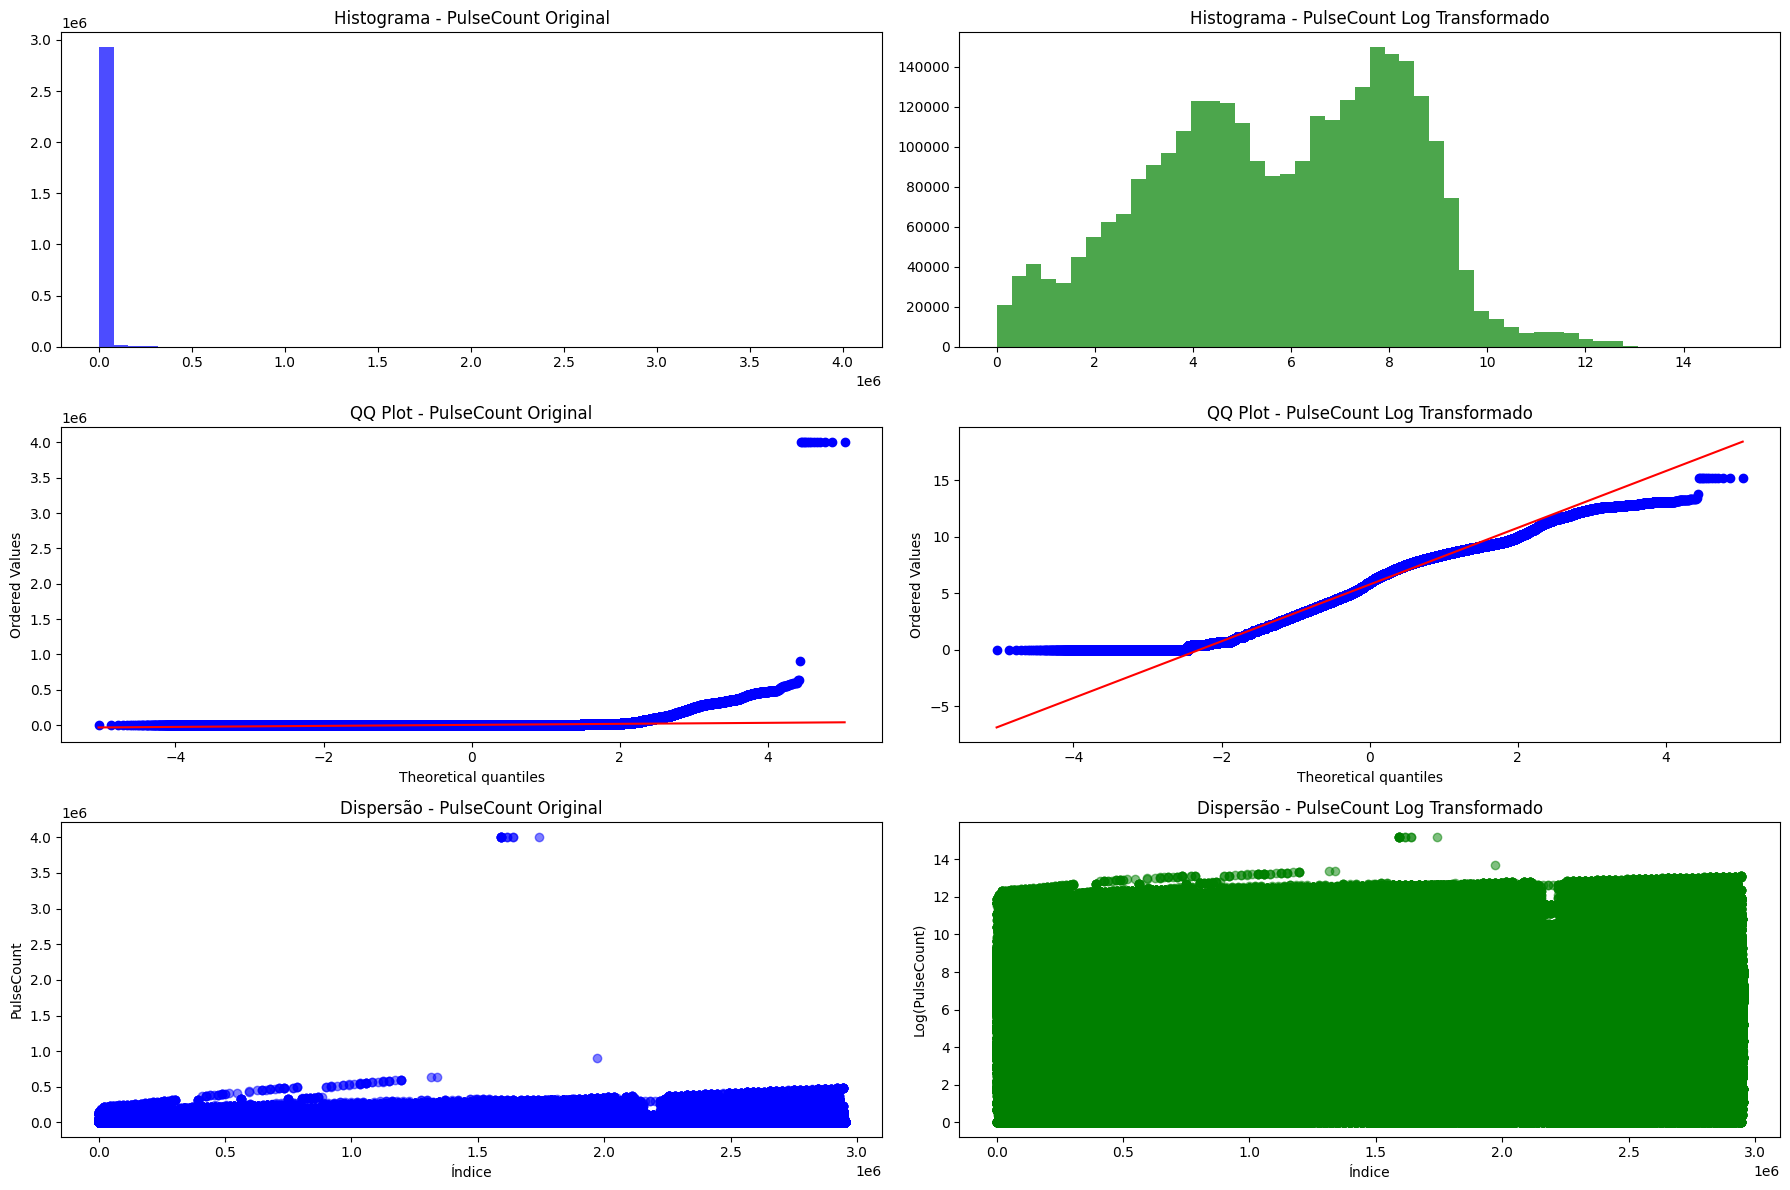

In [ ]:
import scipy.stats as stats

plt.figure(figsize=(18, 12))

# 1. Histograma Antes e Depois
plt.subplot(3, 2, 1)
plt.hist(df_encoded['pulseCount'], bins=50, alpha=0.7, color='blue')
plt.title('Histograma - PulseCount Original')

plt.subplot(3, 2, 2)
plt.hist(df_encoded['log_pulseCount'], bins=50, alpha=0.7, color='green')
plt.title('Histograma - PulseCount Log Transformado')

# 2. QQ Plot Antes e Depois
plt.subplot(3, 2, 3)
stats.probplot(df_encoded['pulseCount'], dist="norm", plot=plt)
plt.title('QQ Plot - PulseCount Original')

plt.subplot(3, 2, 4)
stats.probplot(df_encoded['log_pulseCount'], dist="norm", plot=plt)
plt.title('QQ Plot - PulseCount Log Transformado')

# 3. Gráfico de Dispersão Antes e Depois
plt.subplot(3, 2, 5)
plt.scatter(range(len(df_encoded)), df_encoded['pulseCount'], color='blue', alpha=0.5)
plt.title('Dispersão - PulseCount Original')
plt.xlabel('Índice')
plt.ylabel('PulseCount')

plt.subplot(3, 2, 6)
plt.scatter(range(len(df_encoded)), df_encoded['log_pulseCount'], color='green', alpha=0.5)
plt.title('Dispersão - PulseCount Log Transformado')
plt.xlabel('Índice')
plt.ylabel('Log(PulseCount)')

plt.tight_layout()
plt.show()

##### Normalização da Variável Gain

In [ ]:
# Normalização da variável gain
df_encoded['gain'] = (df_encoded['gain'] - df_encoded['gain'].mean()) / df_encoded['gain'].std()

#### Entendimento

In [ ]:
# Obtém os tipos de dados das colunas
dtypes = df_encoded.dtypes

# Cria listas de colunas com base no dtype
object_cols = [col for col in dtypes.index if dtypes[col] == 'object']
non_object_cols = [col for col in dtypes.index if dtypes[col] != 'object']

# Cria a lista de colunas ordenada
sorted_cols = object_cols + non_object_cols

# Reordena o DataFrame conforme a lista ordenada
df_sorted = df_encoded[sorted_cols]

print("Informações do dataframe codificado (df_encoded) ordenado pelo data type:\n")
print(df_sorted.info())

Informações do dataframe codificado (df_encoded) ordenado pelo data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951243 entries, 0 to 2951242
Data columns (total 57 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   clientCode                              object        
 1   meterSN                                 object        
 2   condCode                                object        
 3   clientIndex                             int64         
 4   meterIndex                              float64       
 5   initialIndex                            float64       
 6   pulseCount                              float64       
 7   gain                                    float64       
 8   datetime                                datetime64[ns]
 9   rssi                                    float64       
 10  gatewayGeoLocation.alt                  float64       
 11  gatewayGeoLocation.lat     

Podemos notar que as únicas colunas que não são númericas são as colunas identificadores ('id_features'), assim nossa codificação está completa!

Nota: poderíamos utilizar um escalador (como o MinMaxScaler do Sklearn) nas colunas a partir de agora, mas escolhemos preservar a escala dos dados para manter a interpretabilidade e evitar limitações para a próxima etapa de feature engineering e criação de modelos.

In [ ]:
print(id_features)

['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']


### Tratamento de Outliers

Neste projeto, os outliers não serão removidos, pois o foco é identificar anomalias no consumo de gás. Em vez disso, estamos tratando os outliers como casos de interesse que precisam ser analisados e modelados adequadamente. A seguir, são apresentadas as técnicas utilizadas para a detecção e análise desses outliers.

##### Visualização de Outliers

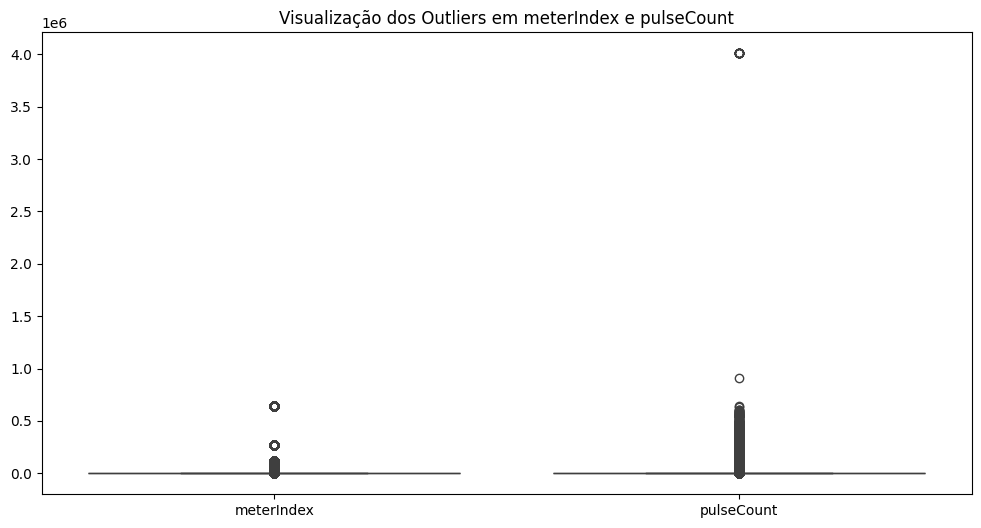

In [ ]:
# Visualização dos outliers em meterIndex e pulseCount
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['meterIndex', 'pulseCount']])
plt.title('Visualização dos Outliers em meterIndex e pulseCount')
plt.show()

## 4.2.3. Levantamento de Hipóteses
Nesta seção, levantamos e justificamos 3 hipóteses relacionadas ao problema e ao conjunto de dados em questão. O levantamento de hipóteses é uma etapa crítica para orientar a análise e a modelagem, proporcionando uma base sólida para as decisões subsequentes

*O código dos gráficos a seguir foi feito para uma outra versão do tratamento de dados, portanto ele não será executado corretamente na versão atual. Ele foi mantido para demonstrar como os gráficos que embasaram as hipóteses foram gerados.*

### 1. **Hipótese de Concentração em Regiões Desenvolvidas**

**Hipótese:**
Regiões mais desenvolvidas da cidade, como áreas centrais, são supostamente as que apresentam a maior taxa de instalação de gás encanado. Essa suposição baseia-se na ideia de que essas áreas possuem melhor infraestrutura urbana e maior demanda por comodidades modernas, o que facilita a adoção de serviços como o gás encanado. O bairro Centro, por exemplo, é frequentemente mencionado como uma região com alto índice de instalações devido à sua relevância comercial e residencial.


**O que foi encontrado:**
Os dados confirmam que o bairro Centro possui o maior número de instalações de gás encanado, conforme ilustrado no gráfico abaixo. Esse gráfico mostra uma diferença significativa em relação a outros bairros, sugerindo que áreas mais desenvolvidas têm uma infraestrutura mais robusta e maior adesão ao serviço de gás encanado. A análise reflete a influência de fatores econômicos e de infraestrutura na distribuição das instalações.

#### Gráficos de relação entre as colunas bairro e categoria

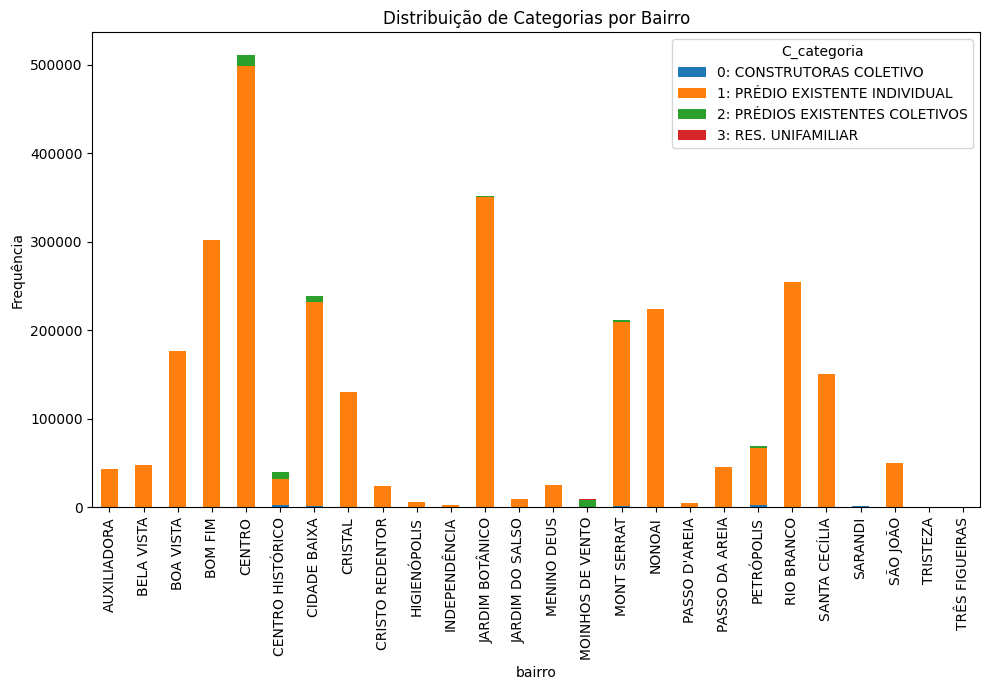

In [ ]:
# Gerando o histograma para (C_bairro, C_categoria) no DataFrame original
bairro_categoria = df.groupby(['bairro', 'C_categoria']).size().unstack()

bairro_categoria.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Distribuição de Categorias por Bairro')
plt.xlabel('bairro')
plt.ylabel('Frequência')
plt.legend([f"{code}: {label}" for label, code in categoria_mapping.items()], title='C_categoria')
plt.tight_layout()
plt.show()

### 2. **Hipótese de Preferência por Instalações em Bairros Abastados**

**Hipótese:**  
Residências situadas em bairros mais abastados, como Moinhos de Vento, são consideradas mais propensas a possuir instalações de gás encanado, enquanto residências em áreas menos favorecidas tendem a optar por alternativas como botijões de gás. Essa diferença pode ser atribuída ao maior poder aquisitivo dos moradores e à busca por conveniência e segurança, características mais prevalentes em bairros de alto padrão.


**O que foi encontrado:**  
A análise confirma que o bairro Moinhos de Vento, reconhecido como uma área de alto padrão, apresenta a maior concentração de casas com gás encanado, como mostrado no gráfico abaixo. Em contrapartida, bairros com menor poder aquisitivo demonstram uma preferência por botijões de gás, provavelmente devido aos custos mais baixos de instalação e à infraestrutura limitada. Esses resultados destacam a relação entre o nível socioeconômico e o tipo de instalação de gás adotada. Outras cidades menores não possuem dados suficientes para realizar uma análise parecida. (Fonte disponível na documentação)

#### Gráficos de relação entre as colunas bairro e categoria sem o valor prédios existente individual

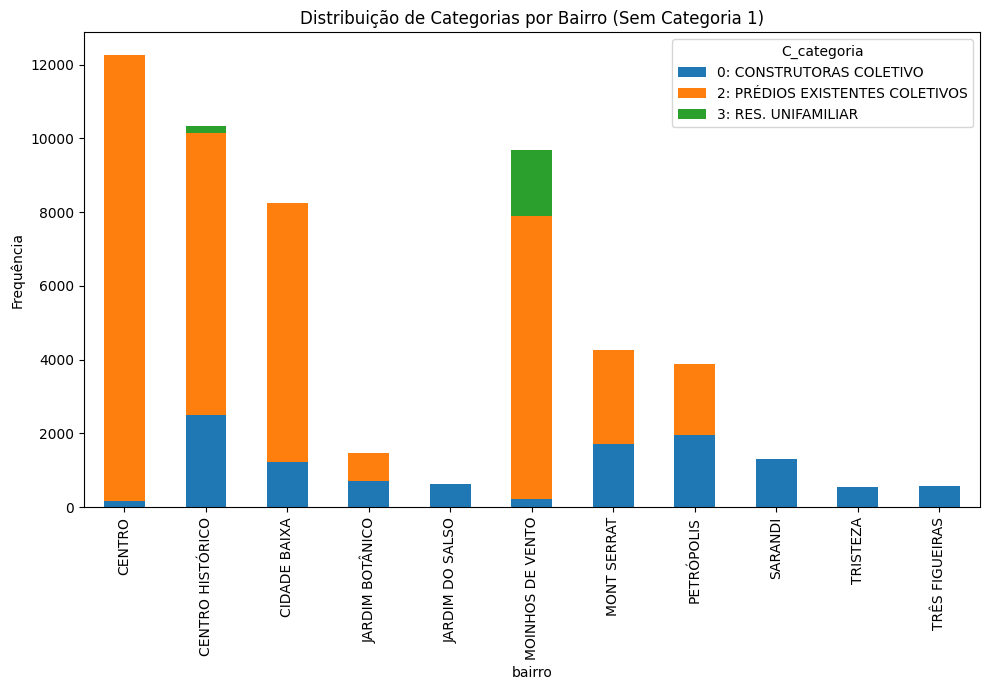

In [ ]:
if generate_plots:
    # Filtrando o DataFrame para remover as linhas onde C_categoria é igual a 1
    df_filtered = df[df['C_categoria'] != 1]

    # Filtrando os labels de acordo com os dados filtrados
    categorias_presentes_filt = df_filtered['C_categoria'].unique() 

    # Agrupando por bairro e C_categoria após a filtragem
    bairro_categoria_filt = df_filtered.groupby(['bairro', 'C_categoria']).size().unstack()

    # Gerando o histograma para (C_bairro, C_categoria) após a filtragem
    bairro_categoria_filt.plot(kind='bar', stacked=True, figsize=(10, 7))
    plt.title('Distribuição de Categorias por Bairro (Sem Categoria 1)')
    plt.xlabel('bairro')
    plt.ylabel('Frequência')
    plt.legend([f"{code}: {label}" for label, code in categoria_mapping.items() if code in categorias_presentes_filt], title='C_categoria')
    plt.tight_layout()
    plt.show()

### 3. **Hipótese de Consumo em Dias de Maior Permanência Domiciliar**

**Hipótese:**  
Estima-se que o consumo de gás seja mais elevado em dias em que as pessoas tendem a permanecer em casa, como fins de semana e feriados. Essa hipótese se baseia na ideia de que a maior atividade doméstica, como cozinhar, ocorre com mais frequência nesses dias, resultando em maior consumo de gás. Em particular, os domingos são esperados para apresentar um aumento no consumo devido à reunião familiar e outras atividades domésticas.


**O que foi encontrado:**  
Os dados indicam que os domingos realmente apresentam uma média mais alta no índice de consumo de gás (meterIndex), conforme evidenciado no gráfico abaixo. Esse padrão está alinhado com a expectativa de maior permanência das pessoas em casa nesses dias. Os resultados sugerem que a maior parte do consumo registrado provém de residências, onde o uso do gás é intensificado em momentos de lazer e convivência familiar.

#### Gráfico da média do meterIndex por dia da semana

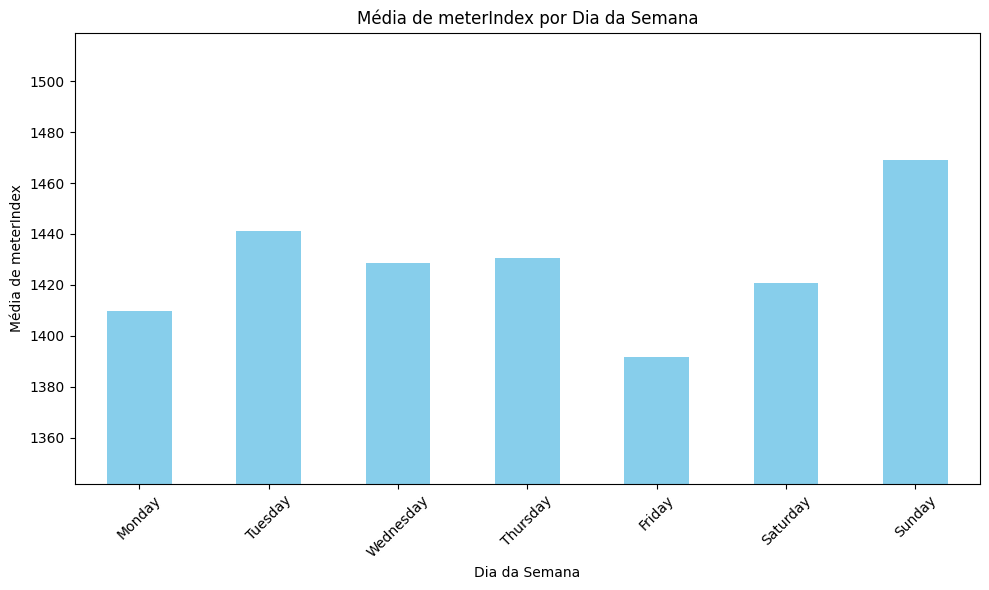

In [ ]:
if generate_plots:
    # Converter a coluna 'timestamp' de Unix timestamp para datetime temporariamente
    df_temp = df.copy()  # Criar uma cópia temporária do DataFrame
    df_temp['timestamp'] = pd.to_datetime(df_temp['timestamp'], unit='s') # Converter a coluna 'timestamp' para datetime

    # Extrair o dia da semana a partir da coluna 'timestamp' temporária
    df_temp['day_of_week'] = df_temp['timestamp'].dt.day_name() 

    # Agrupar por dia da semana e calcular a média do 'meterIndex'
    meter_count_by_day = df_temp.groupby('day_of_week')['meterIndex'].mean()

    # Ordenar os dias da semana na ordem correta
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    meter_count_by_day = meter_count_by_day.reindex(days_order) 

    # Gerar o gráfico de média de 'meterIndex' por dia da semana
    plt.figure(figsize=(10, 6))
    meter_count_by_day.plot(kind='bar', color='skyblue')
    plt.title('Média de meterIndex por Dia da Semana')
    plt.xlabel('Dia da Semana')
    plt.ylabel('Média de meterIndex')
    plt.ylim([meter_count_by_day.min() - 50, meter_count_by_day.max() + 50])  # amplia as diferenças para melhor visualização
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df